<a href="https://colab.research.google.com/github/Mihai5469/PCTO23-24/blob/main/es4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import warnings
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

Lettura dataset

In [50]:
pubblicita = pd.DataFrame(pd.read_csv('pub.csv'))
pubblicita.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [51]:
pubblicita.shape

(200, 4)

In [52]:
pubblicita.describe()
#pubblicita.info()

,TV,Radio,Newspaper,Sales
count,200.000000,199.000000,199.000000,200.000000
mean,147.042500,23.196985,30.649246,15.130500
std,85.854236,14.853898,21.791748,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.950000,12.850000,11.000000
50%,149.750000,22.500000,25.900000,16.000000
75%,218.825000,36.400000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [53]:
#pubblicita.isnull().sum*100/pubblicita.shape[0]
pubblicita.isnull().sum()*100/pubblicita.shape[0]

TV           0.0
Radio        0.5
Newspaper    0.5
Sales        0.0
dtype: float64

In [54]:
pubblicita = pubblicita.dropna()

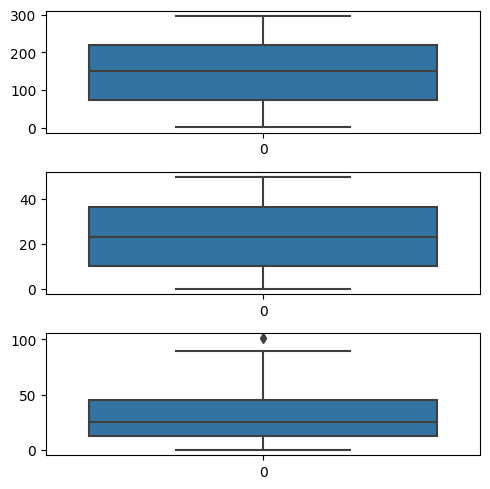

In [55]:
fig, axs = plt.subplots(3, figsize = (5,5))

plt1 = sns.boxplot(pubblicita['TV'], ax = axs[0])
plt2 = sns.boxplot(pubblicita['Radio'], ax = axs[1])
plt3 = sns.boxplot(pubblicita['Newspaper'], ax = axs[2])

plt.tight_layout()

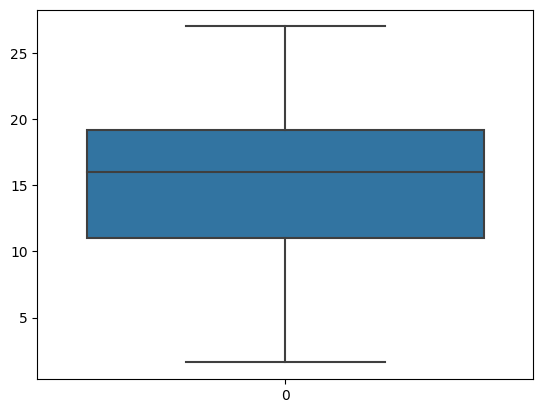

In [56]:
sns.boxplot(pubblicita['Sales'])
plt.show()

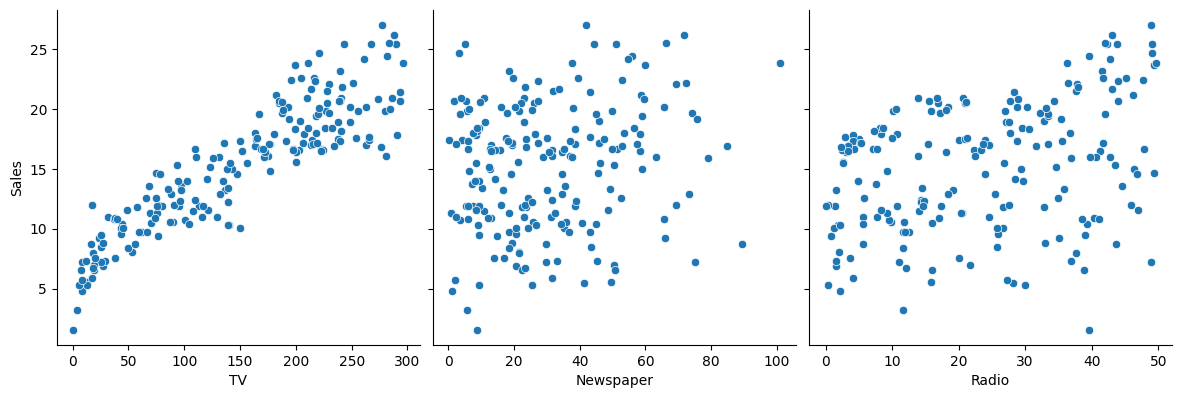

In [57]:
sns.pairplot(pubblicita, x_vars=['TV','Newspaper', 'Radio'], y_vars= 'Sales', height=4, aspect=1, kind='scatter')
plt.show()

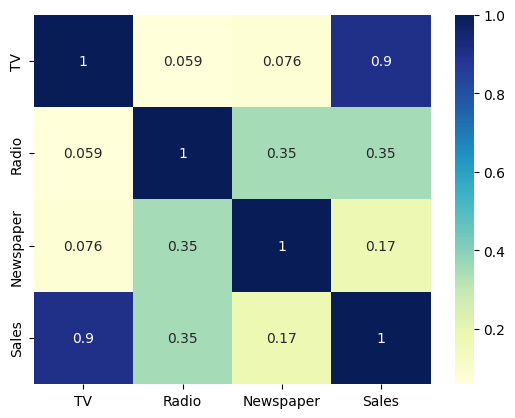

In [58]:
sns.heatmap(pubblicita.corr(), cmap = 'YlGnBu', annot=True)
plt.show()

In [59]:
x = pubblicita['TV']
y = pubblicita['Sales']

In [60]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)

**vediamo dati training**

In [61]:
import statsmodels.api as sm

In [65]:
x_train_sm = sm.add_constant(x_train)

lr = sm.OLS(y_train, x_train_sm).fit()

lr.params

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     519.8
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           2.67e-48
Time:                        14:42:17   Log-Likelihood:                -313.58
No. Observations:                 138   AIC:                             631.2
Df Residuals:                     136   BIC:                             637.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1100      0.414     17.177      0.0

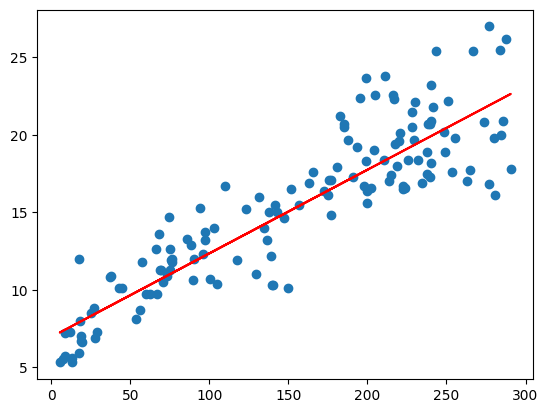

In [66]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.948+0.054*x_train,'r')


<Figure size 640x480 with 0 Axes>

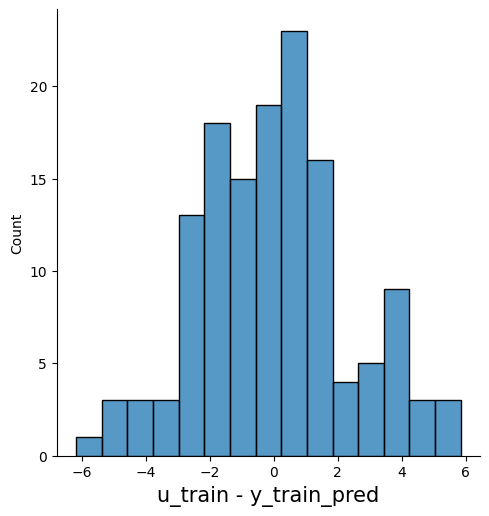

In [67]:
y_train_pred = lr.predict(x_train_sm)
res = (y_train - y_train_pred)

fig = plt.figure()
sns.displot(res,bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('u_train - y_train_pred', fontsize = 15)
plt.show()

In [68]:
x_test_sm = sm.add_constant(x_test)

y_pred = lr.predict(x_test_sm)

y_pred.head()

128    19.008750
106     8.460263
101    23.119041
94     12.910828
113    18.430824
dtype: float64

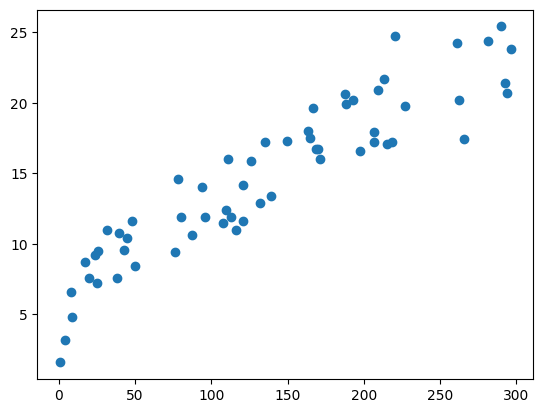

In [69]:
plt.scatter(x_test, y_test)
